In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_file = '/home/unix/jiahao/wanglab/Data/Analyzed/2023-09-19-wendyw-WW_SC_005/expr/2023-11-30-Brain-STARmap-DRNSubclustered-ct-bk.h5ad'
adata = sc.read_h5ad(input_file)
adata

AnnData object with n_obs × n_vars = 44121 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_5_genes', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'n_genes', 'n_counts', 'protocol-sample', 'leiden', 'orig_leiden', 'level_1', 'level_2', 'level_3', 'level_3_temp'
    var: 'max_counts_sample1_STARmap', 'max_counts_sample2_STARmap', 'max_counts_sample3_STARmap', 'max_counts_sample4_STARmap', 'detected', 'highly_variable', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'level_3_temp_colors', 'log1p', 'neighbors', 'pca', 'protocol-sample_colors', 'protocol_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'combat', 'corrected', 'raw', 'scaled'
    obsp: 'connectivities', 'distances'

In [13]:
level_2_pl = sns.color_palette('Set2_r', n_colors=8)
level_2_pl

[(0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


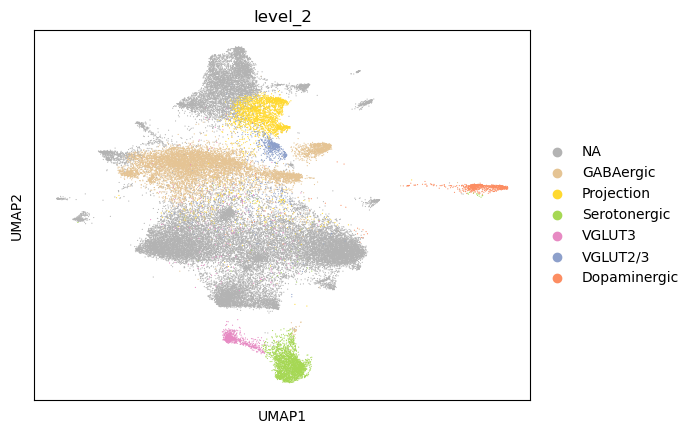

In [14]:
sc.pl.umap(adata, color='level_2', palette=level_2_pl)

In [44]:
sdata = adata[adata.obs['level_1'] == 'DRN', ]
sdata

View of AnnData object with n_obs × n_vars = 15981 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_5_genes', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'n_genes', 'n_counts', 'protocol-sample', 'leiden', 'orig_leiden', 'level_1', 'level_2', 'level_3', 'level_3_temp'
    var: 'max_counts_sample1_STARmap', 'max_counts_sample2_STARmap', 'max_counts_sample3_STARmap', 'max_counts_sample4_STARmap', 'detected', 'highly_variable', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'level_3_temp_colors', 'log1p', 'neighbors', 'pca', 'protocol-sample_colors', 'protocol_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'combat', 'corrected', 'raw', 'scaled'
    obsp: 'connectivities', 'distances'

In [5]:
sdata.X = sdata.layers['raw']
output_path = '/home/unix/jiahao/wanglab/Data/Analyzed/2023-09-19-wendyw-WW_SC_005/expr'
sdata.write_csvs(output_path, skip_data=False, sep=',')

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/anndata/_core/aligned_mapping.py:232: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{key}{icolumn + 1}"] = column
/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/anndata/_core/aligned_mapping.py:232: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{key}{icolumn + 1}"] = column


## Check predicted labels

In [15]:
base_path = '/home/unix/jiahao/wanglab/Data/Analyzed/2023-09-19-wendyw-WW_SC_005/expr/other-datasets/Huang eLife 2019 Data/'

all_pca_celltype = pd.read_csv(os.path.join(base_path, "starmap_predicted_cell_type_labels_allfeature_pca.csv"))
all_pca_subtype = pd.read_csv(os.path.join(base_path, "starmap_predicted_sub_type_labels_allfeature_pca.csv"))

all_cca_celltype = pd.read_csv(os.path.join(base_path, "starmap_predicted_cell_type_labels_allfeature_cca.csv"))
all_cca_subtype = pd.read_csv(os.path.join(base_path, "starmap_predicted_sub_type_labels_allfeature_cca.csv"))

var_pca_celltype = pd.read_csv(os.path.join(base_path, "starmap_predicted_cell_type_labels_varfeature_pca.csv"))
var_pca_subtype = pd.read_csv(os.path.join(base_path, "starmap_predicted_sub_type_labels_varfeature_pca.csv"))

var_cca_celltype = pd.read_csv(os.path.join(base_path, "starmap_predicted_cell_type_labels_varfeature_cca.csv"))
var_cca_subtype = pd.read_csv(os.path.join(base_path, "starmap_predicted_sub_type_labels_varfeature_cca.csv"))

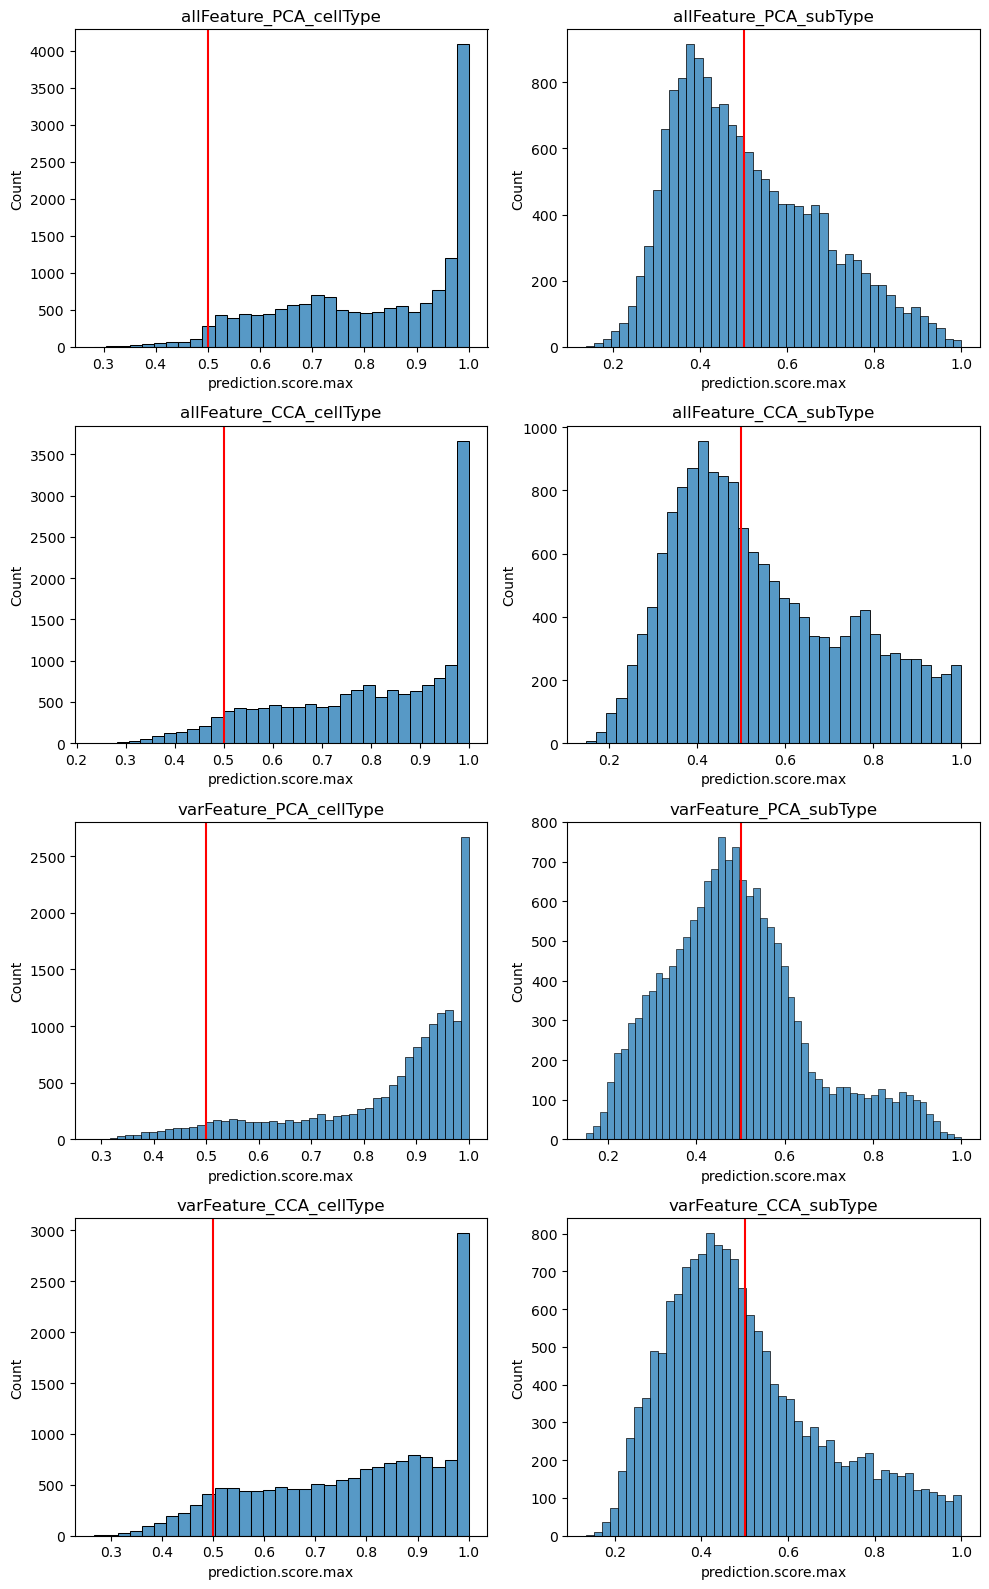

In [16]:
fig, axs = plt.subplots(figsize=(10,16), ncols=2, nrows=4)
axs = axs.flatten()

sns.histplot(all_pca_celltype['prediction.score.max'], ax=axs[0])
axs[0].axvline(x=0.5, color='r')
axs[0].title.set_text('allFeature_PCA_cellType')

sns.histplot(all_pca_subtype['prediction.score.max'], ax=axs[1])
axs[1].axvline(x=0.5, color='r')
axs[1].title.set_text('allFeature_PCA_subType')

sns.histplot(all_cca_celltype['prediction.score.max'], ax=axs[2])
axs[2].axvline(x=0.5, color='r')
axs[2].title.set_text('allFeature_CCA_cellType')

sns.histplot(all_cca_subtype['prediction.score.max'], ax=axs[3])
axs[3].axvline(x=0.5, color='r')
axs[3].title.set_text('allFeature_CCA_subType')

sns.histplot(var_pca_celltype['prediction.score.max'], ax=axs[4])
axs[4].axvline(x=0.5, color='r')
axs[4].title.set_text('varFeature_PCA_cellType')

sns.histplot(var_pca_subtype['prediction.score.max'], ax=axs[5])
axs[5].axvline(x=0.5, color='r')
axs[5].title.set_text('varFeature_PCA_subType')

sns.histplot(var_cca_celltype['prediction.score.max'], ax=axs[6])
axs[6].axvline(x=0.5, color='r')
axs[6].title.set_text('varFeature_CCA_cellType')

sns.histplot(var_cca_subtype['prediction.score.max'], ax=axs[7])
axs[7].axvline(x=0.5, color='r')
axs[7].title.set_text('varFeature_CCA_subType')


fig.tight_layout()
plt.show()


In [25]:
level_2_pl

[(0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

In [26]:
list(level_2_pl)
cca_celltype_colors = [(0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
                        (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
                        (1.0, 0.8509803921568627, 0.1843137254901961),
                        (0.4, 0.7607843137254902, 0.6470588235294118),
                         (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
                         (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]
cca_celltype_pl = sns.color_palette(cca_celltype_colors)

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


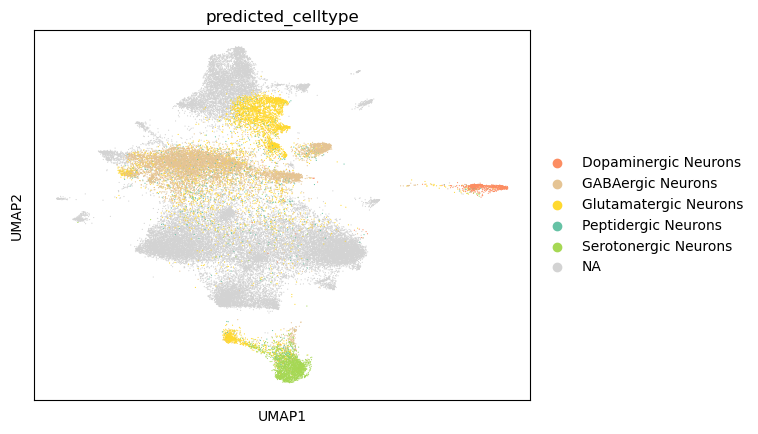

In [27]:
all_cca_celltype.index = all_cca_celltype.index.astype(str)
adata.obs.loc[all_cca_celltype.index, 'predicted_celltype'] = all_cca_celltype['predicted.id'].values
adata.obs.loc[all_cca_celltype.index, 'predicted_celltype_scores'] = all_cca_celltype['prediction.score.max'].values

all_cca_subtype.index = all_cca_subtype.index.astype(str)
adata.obs.loc[all_cca_subtype.index, 'predicted_subtype'] = all_cca_subtype['predicted.id'].values
adata.obs.loc[all_cca_subtype.index, 'predicted_subtype_scores'] = all_cca_subtype['prediction.score.max'].values

sc.pl.umap(adata, color=['predicted_celltype'], palette=cca_celltype_pl)

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


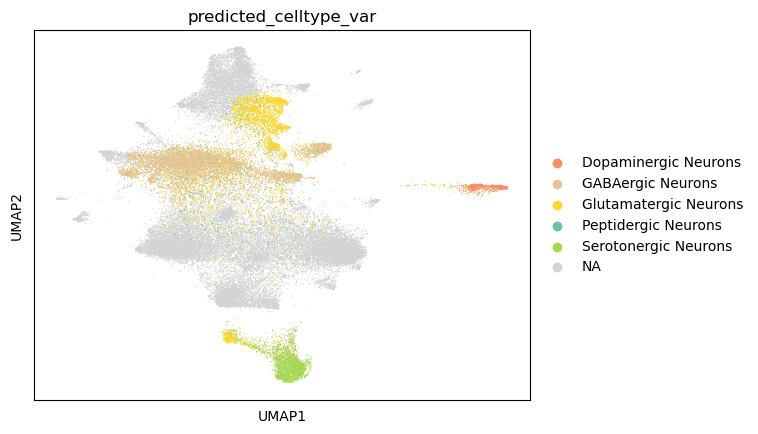

In [29]:
var_cca_celltype.index = var_cca_celltype.index.astype(str)
adata.obs.loc[var_cca_celltype.index, 'predicted_celltype_var'] = var_cca_celltype['predicted.id'].values
adata.obs.loc[var_cca_celltype.index, 'predicted_celltype_var_scores'] = var_cca_celltype['prediction.score.max'].values

var_cca_subtype.index = var_cca_subtype.index.astype(str)
adata.obs.loc[var_cca_subtype.index, 'predicted_subtype_var'] = var_cca_subtype['predicted.id'].values
adata.obs.loc[var_cca_subtype.index, 'predicted_subtype_var_scores'] = var_cca_subtype['prediction.score.max'].values

sc.pl.umap(adata, color=['predicted_celltype_var'], palette=cca_celltype_pl)

In [34]:
df = pd.crosstab(adata.obs['level_2'], adata.obs['predicted_celltype'])
df_var = pd.crosstab(adata.obs['level_2'], adata.obs['predicted_celltype_var'])

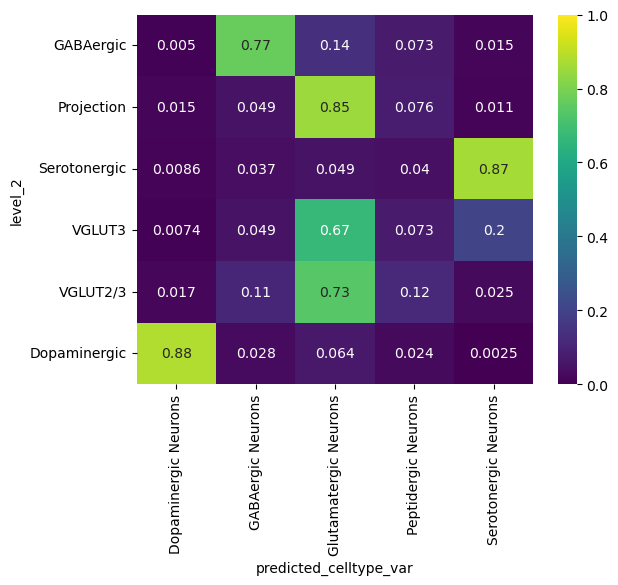

In [47]:
b = df_var.div(df_var.sum(axis=1), axis=0)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
# df_scaled = std_scaler.fit_transform(b.to_numpy())
# df_scaled = pd.DataFrame(df_scaled, columns=b.columns, index=b.index)

df_scaled = std_scaler.fit_transform(b.T.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=b.index, index=b.columns)
sns.heatmap(b, annot=True, cmap='viridis', vmin=0, vmax=1)
plt.show()
# sns.heatmap(df_scaled, annot=True, cmap='bwr', vmin=-1, vmax=1)

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


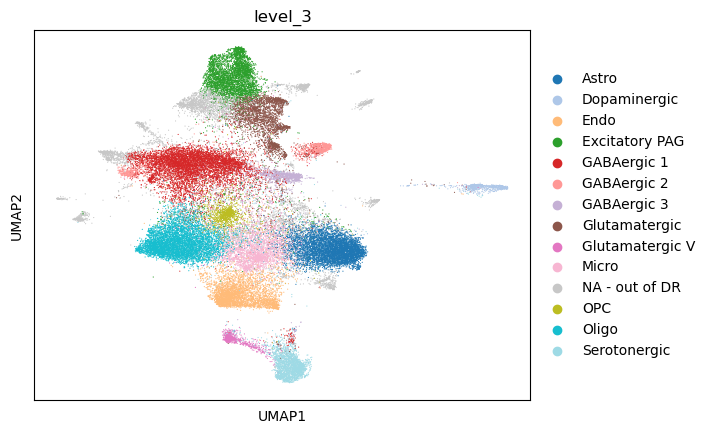

In [57]:
sc.pl.umap(adata, color='level_3', palette='tab20')
plt.show()

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


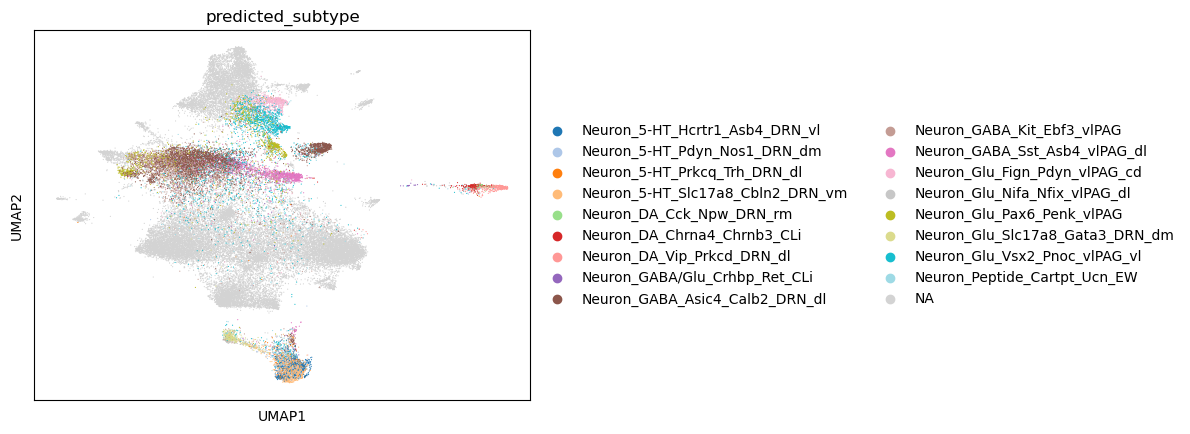

In [53]:
sc.pl.umap(adata, color='predicted_subtype', palette='tab20')

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


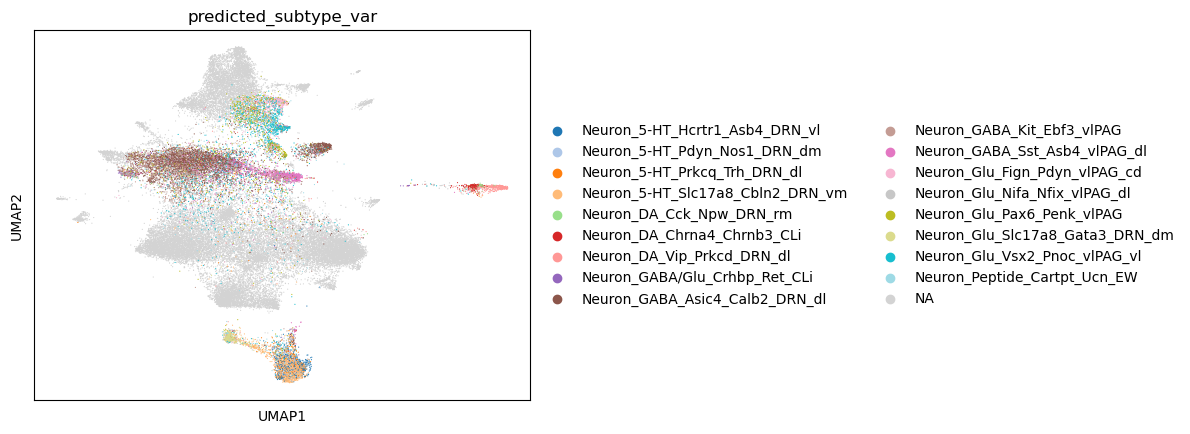

In [54]:
sc.pl.umap(adata, color='predicted_subtype_var', palette='tab20')

In [58]:
df = pd.crosstab(adata.obs['level_3'], adata.obs['predicted_subtype'])
df_var = pd.crosstab(adata.obs['level_3'], adata.obs['predicted_subtype_var'])

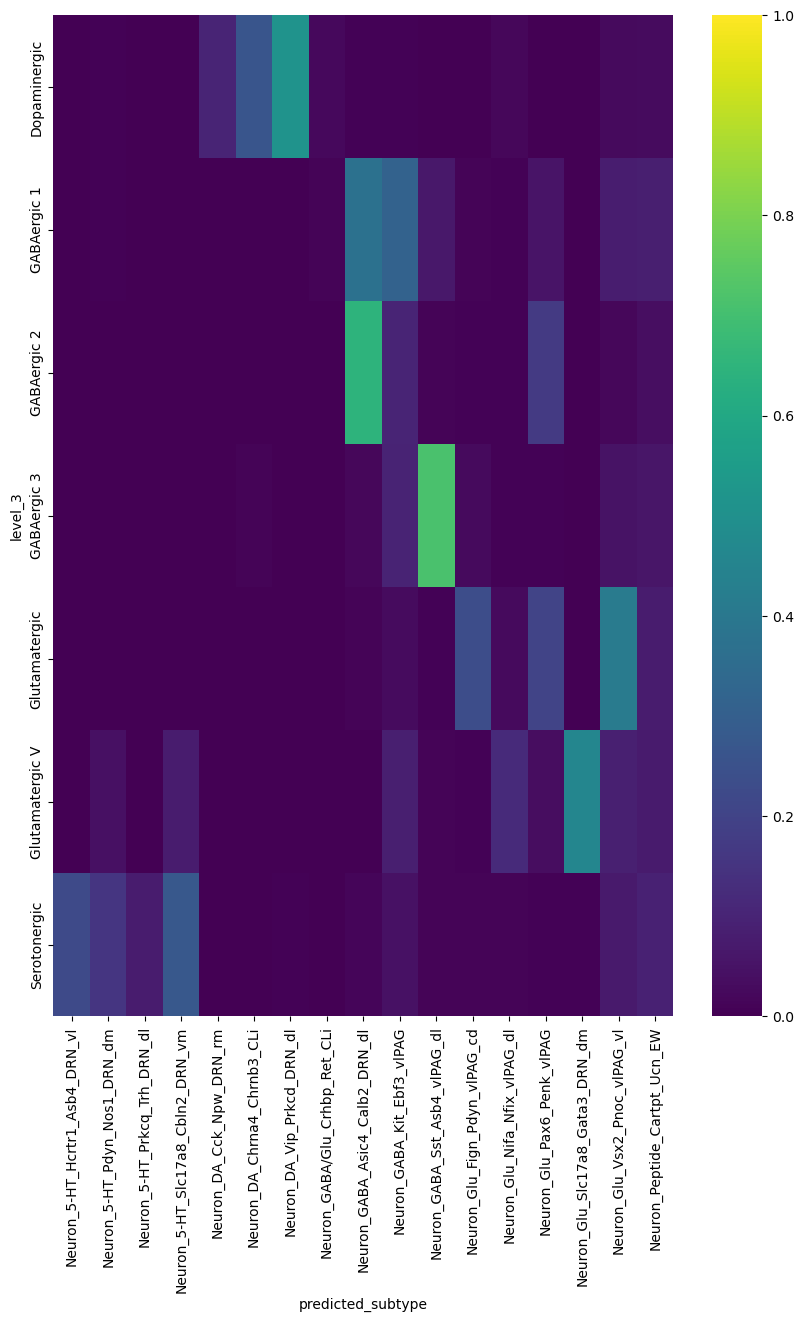

In [63]:
b = df.div(df.sum(axis=1), axis=0)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
# df_scaled = std_scaler.fit_transform(b.to_numpy())
# df_scaled = pd.DataFrame(df_scaled, columns=b.columns, index=b.index)

df_scaled = std_scaler.fit_transform(b.T.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=b.index, index=b.columns)

fig, ax = plt.subplots(figsize=(10, 13))
sns.heatmap(b, annot=False, cmap='viridis', vmin=0, vmax=1)
plt.show()
# sns.heatmap(df_scaled, annot=True, cmap='bwr', vmin=-1, vmax=1)